## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---


The images for camera calibration are stored in the folder called camera_cal. The images in test_images are for testing your pipeline on single frames. If you want to extract more test images from the videos, you can simply use an image writing method like cv2.imwrite(), i.e., you can read the video in frame by frame as usual, and for frames you want to save for later you can write to an image file.

To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called output_images, and include a description in your writeup for the project of what each image shows. The video called project_video.mp4 is the video your pipeline should work well on.

The challenge_video.mp4 video is an extra (and optional) challenge for you if you want to test your pipeline under somewhat trickier conditions. The harder_challenge.mp4 video is another optional challenge and is brutal!

If you're feeling ambitious (again, totally optional though), don't stop there! We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!



## Compute the camera calibration using chessboard images

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
import cv2
%matplotlib inline

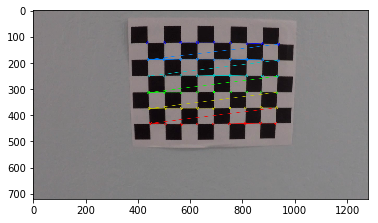

In [17]:


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        last_image = img

plt.imshow(img)

In [14]:
# Correct for distortion
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


In [15]:
undistorted = cal_undistort(img, objpoints, imgpoints)

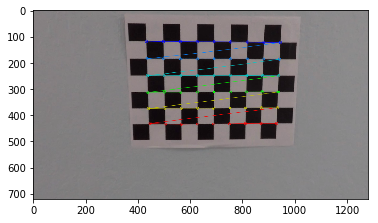

In [16]:
plt.imshow(undistorted)

In [7]:
images

['camera_cal/calibration3.jpg',
 'camera_cal/calibration9.jpg',
 'camera_cal/calibration12.jpg',
 'camera_cal/calibration20.jpg',
 'camera_cal/calibration16.jpg',
 'camera_cal/calibration13.jpg',
 'camera_cal/calibration14.jpg',
 'camera_cal/calibration4.jpg',
 'camera_cal/calibration7.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration11.jpg',
 'camera_cal/calibration17.jpg',
 'camera_cal/calibration1.jpg',
 'camera_cal/calibration19.jpg',
 'camera_cal/calibration10.jpg',
 'camera_cal/calibration5.jpg',
 'camera_cal/calibration15.jpg',
 'camera_cal/calibration8.jpg',
 'camera_cal/calibration6.jpg',
 'camera_cal/calibration18.jpg']

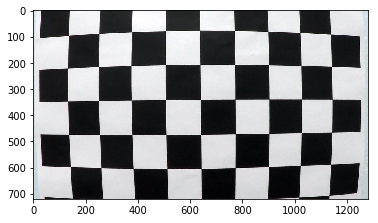

In [18]:
cal_1 = 'camera_cal/calibration1.jpg'
img = cv2.imread(cal_1)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [20]:
undist = cal_undistort(img, objpoints, imgpoints)

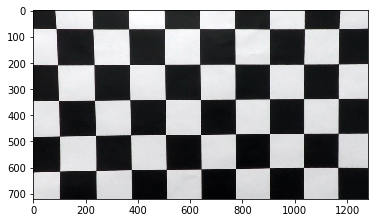

In [21]:
plt.imshow(undist)